In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# 데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 텐서로 변환
    transforms.Normalize((0.5,), (0.5,))  # 평균과 표준편차를 사용하여 정규화
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=100, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=100, shuffle=False)

# 신경망 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        ############### Your code here!!!
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            torch.nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 256),
            torch.nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            torch.nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64),
            torch.nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )

    def forward(self, x):
        ############### Your code here!!!
        # 활성화 함수는 relu 사용
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)  # 데이터를 디바이스로 이동
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



model = SimpleNN()

############### Your code here!!!
# 손실 함수와 옵티마이저 설정
#criterion = ??
#optimizer = ??
learning_rate = 1e-2
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 학습
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)  # 데이터를 디바이스로 이동
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    print(f"{int(correct)} / {int(size)}")
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

# num_epochs = ??
num_epochs = 10
a = 0
l = []
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}")
            test_loop(testloader, model, criterion)
            l.append(running_loss / 100)
            running_loss = 0.0

print("Finished Training")

# 모델 저장
torch.save(model.state_dict(), 'mnist_simple_nn.pth')


[Epoch 1, Batch 100] Loss: 1.376
8579 / 10000
Test Error: 
 Accuracy: 85.8%, Avg loss: 0.907984 

[Epoch 1, Batch 200] Loss: 0.731
9097 / 10000
Test Error: 
 Accuracy: 91.0%, Avg loss: 0.564254 

[Epoch 1, Batch 300] Loss: 0.505
9282 / 10000
Test Error: 
 Accuracy: 92.8%, Avg loss: 0.406649 

[Epoch 1, Batch 400] Loss: 0.391
9372 / 10000
Test Error: 
 Accuracy: 93.7%, Avg loss: 0.323472 

[Epoch 1, Batch 500] Loss: 0.313
9451 / 10000
Test Error: 
 Accuracy: 94.5%, Avg loss: 0.271421 

[Epoch 1, Batch 600] Loss: 0.269
9507 / 10000
Test Error: 
 Accuracy: 95.1%, Avg loss: 0.237127 

[Epoch 2, Batch 100] Loss: 0.214
9516 / 10000
Test Error: 
 Accuracy: 95.2%, Avg loss: 0.215758 

[Epoch 2, Batch 200] Loss: 0.202
9558 / 10000
Test Error: 
 Accuracy: 95.6%, Avg loss: 0.196357 

[Epoch 2, Batch 300] Loss: 0.186
9583 / 10000
Test Error: 
 Accuracy: 95.8%, Avg loss: 0.181931 

[Epoch 2, Batch 400] Loss: 0.178
9593 / 10000
Test Error: 
 Accuracy: 95.9%, Avg loss: 0.171770 

[Epoch 2, Batch 500]

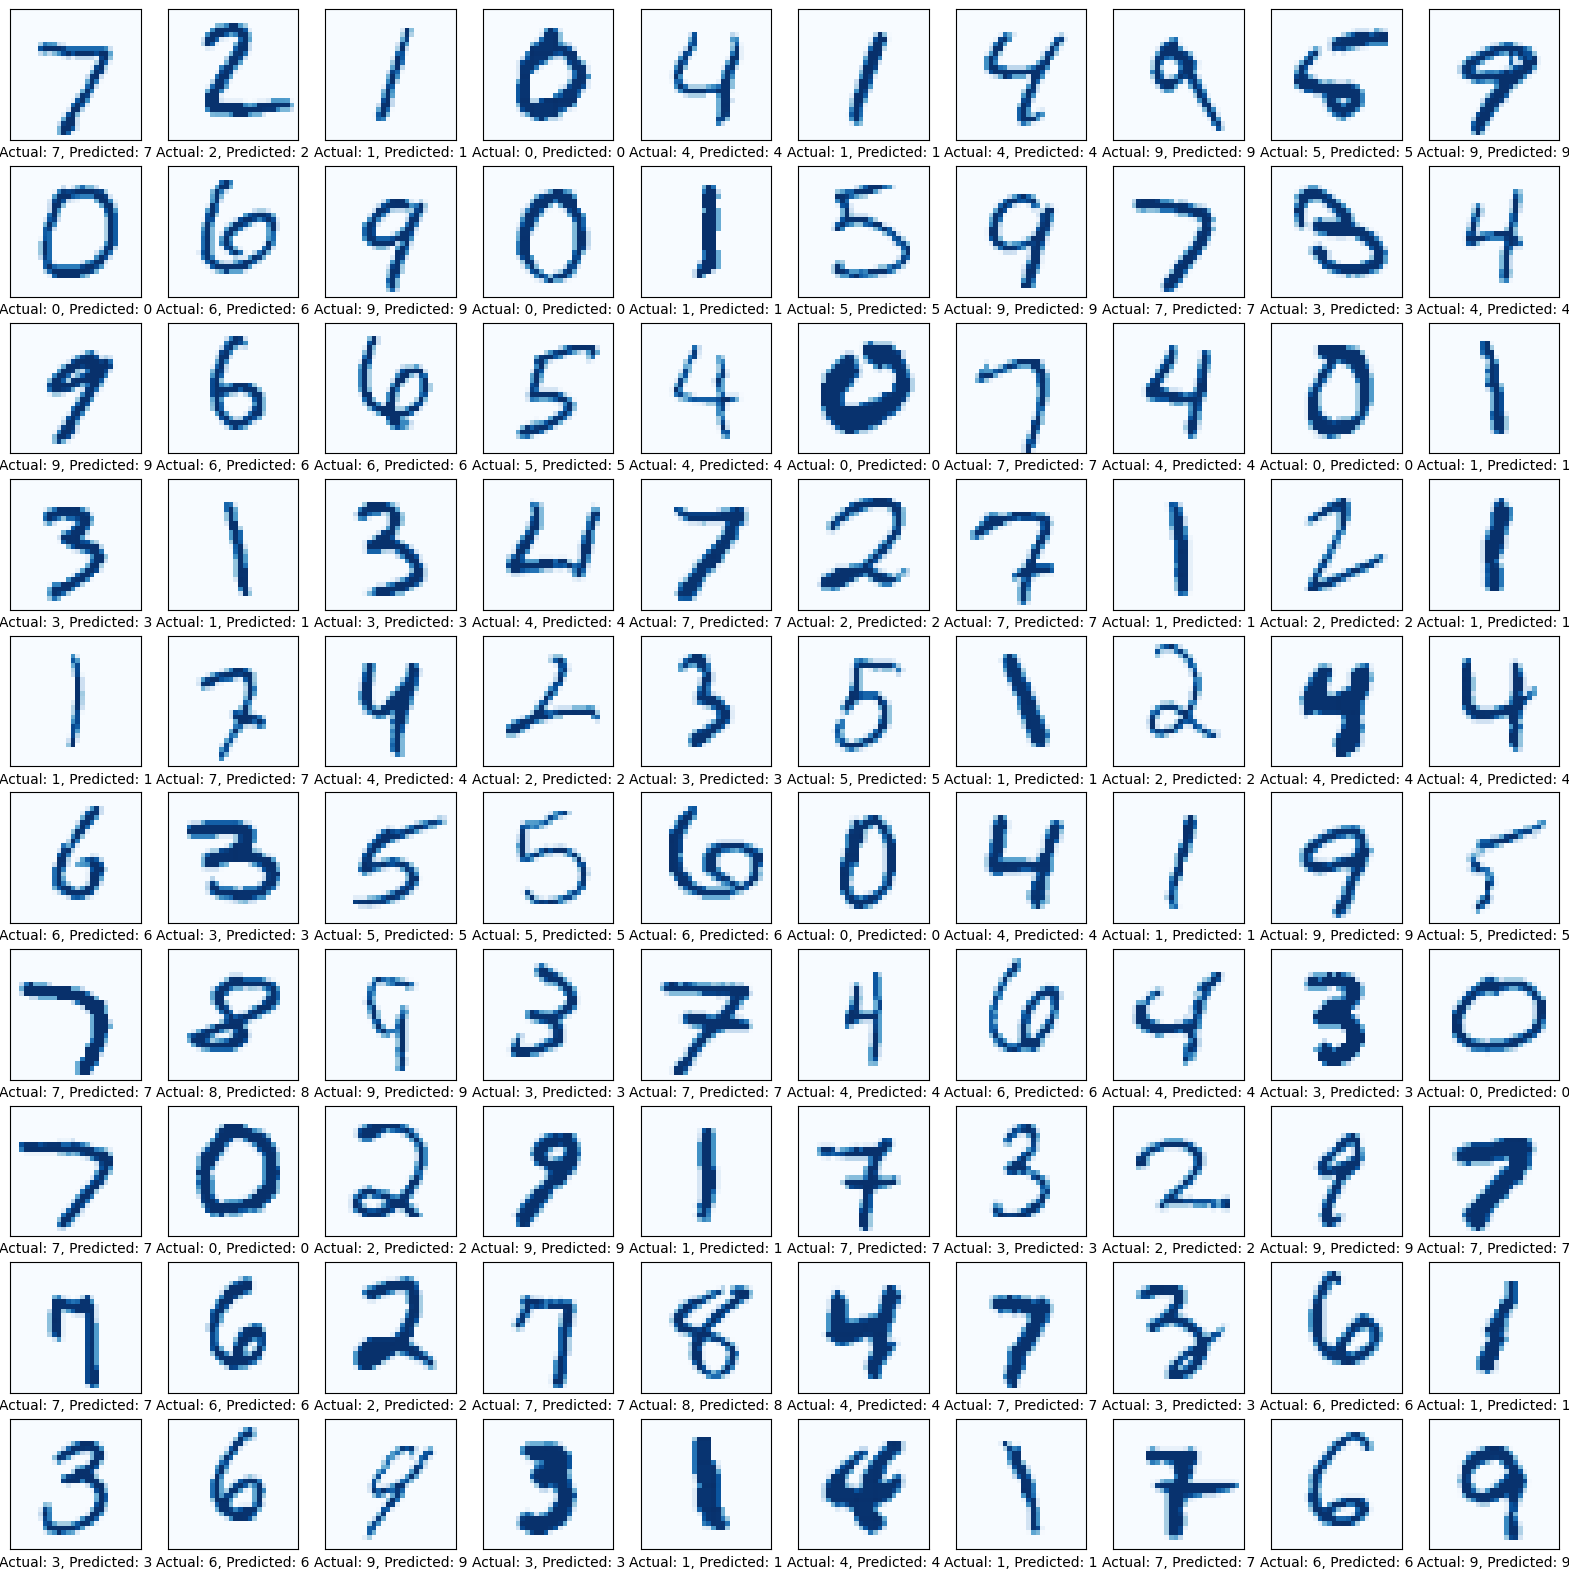

In [19]:
import matplotlib.pyplot as plt

# 학습 완료 후 테스트 데이터로 예측 수행
model.eval()
test_images, test_labels = next(iter(testloader))
test_images, test_labels = test_images.to(device), test_labels.to(device)
with torch.no_grad():
    test_outputs = model(test_images)
softmax = nn.Softmax(dim=1)
probabilities = softmax(test_outputs)
predicted_classes = torch.argmax(probabilities, dim=1)

# 이미지 및 예측 시각화
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if test_labels[i] == predicted_classes[i]:
      cmap = 'Blues'
    else :
      cmap = 'Reds'
    plt.imshow(test_images[i].cpu().numpy().squeeze(), cmap=cmap) # plt.cm.binary
    plt.xlabel(f'Actual: {test_labels[i]}, Predicted: {predicted_classes[i]}')
plt.show()


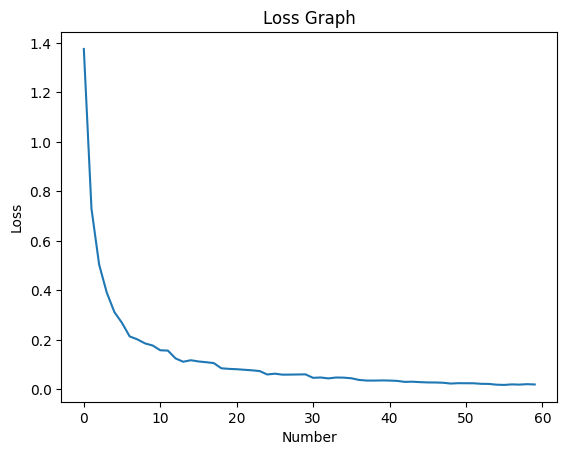

In [5]:
import matplotlib.pyplot as plt

# 선 그래프 그리기
plt.plot(l)

# 그래프에 제목 추가
plt.title('Loss Graph')

# x축과 y축에 레이블 추가
plt.xlabel('Number')
plt.ylabel('Loss')

# 그래프 표시
plt.show()